In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from datetime import datetime

In [3]:
def PW_adj(BNC_PW):
    Adj_PW = []
    for i in range(len(BNC_PW)):
        Adj_PW.append(BNC_PW[i]-50)
    return Adj_PW

def DutyScaler(DutyCycle, Vmeasured, Vextrapolated):
    ScaledDuty = []
    for x in DutyCycle:
        if round(x*Vmeasured/Vextrapolated, 1) <= 100:
            ScaledDuty.append(round(x*Vmeasured/Vextrapolated, 1))
        else:
            ScaledDuty.append(100)
    return ScaledDuty

def VoltageScaler(OutV, Vmeasured, Vextrapolated):
    return [round(x*Vextrapolated/Vmeasured, 1) for x in OutV]

class SOA_Data:    
    """Vch = charge voltage, R = load R, BNC = PW out of BNC pulser, Sw = switch temp, P = power out of DC supply, Vout = voltage measured across pole to ground, Ii = measured ion current"""
    def __init__(self, Vch = 0, R = 1, BNC = [], DC = [], Sw = [], P = [], Vout = [], Ii = []):
        self.Vch = Vch
        self.Rload = R
        self.BNC_PW = BNC
        self.DC = DC
        self.Sw = Sw
        self.P = P
        self.Vout = Vout
        self.Ii = Ii
           
    @property
    def PW(self):
        return [x - 60 - 10 for x in self.BNC_PW]#the 60 ns offset is to account for the delay line, the 10 ns offset is to account for the FICB reducing PWs by 11.5 ns

In [4]:
OpenLoad_Duty = [0, 100, 100]
OpenLoad_600V_OutV = [14.4, 14.4, 0] #these voltages simply from Vch*step-up*2
OpenLoad_500V_OutV = [12, 12, 0] #these voltages simply from Vch*step-up*2

Nov2019_600V_3k = SOA_Data(600, 3000)
Nov2019_600V_3k.BNC_PW = [110, 120, 130, 140]
Nov2019_600V_3k.DC = [100, 100, 100, 90]
Nov2019_600V_3k.Sw = [95, 98, 100, 88]
Nov2019_600V_3k.P = [11.3, 13.5, 18.5, 20]
Nov2019_600V_3k.Vout = [6.0, 7.7, 9, 10]

Nov2019_600V_2k = SOA_Data(600, 2250)
Nov2019_600V_2k.BNC_PW = [110, 120, 130, 140, 150, 160, 180, 200, 220]
Nov2019_600V_2k.DC = [100, 90, 100, 90, 77.5, 72.5, 62.5, 55, 50]
Nov2019_600V_2k.Sw = [92, 97, 98, 84, 84, 84, 72, 66, 66]
Nov2019_600V_2k.P = [11.6, 13.5, 17.9, 20, 20, 20, 20, 20, 20]
Nov2019_600V_2k.Vout = [5, 5.6, 6.4, 7.6, 8.1, 8.3, 9.3, 9.5, 9.5]

Dec2019_500V_1750 = SOA_Data(500, 1750)
Dec2019_500V_1750.DC = [65, 70, 80, 95, 100]
Dec2019_500V_1750.BNC_PW = [220, 200, 180, 160, 140]
Dec2019_500V_1750.Sw = [52, 60, 69, 86, 87]
Dec2019_500V_1750.P = [20, 20, 20, 20, 17.6]
Dec2019_500V_1750.Vout = [8.2, 8.0, 7.4, 6.2, 5.7]
Dec2019_500V_1750.Ii = [3.75, 3.65, 3.1, 2.7]

Dec2019_500V_2k = SOA_Data(500, 2250)
Dec2019_500V_2k.DC = [80, 92.5, 100]
Dec2019_500V_2k.BNC_PW = [200, 180, 160]
Dec2019_500V_2k.Sw = [70, 73, 74]
Dec2019_500V_2k.P = [20.7, 20.5, 19.2]
Dec2019_500V_2k.Vout = [8.0, 7.4, 7.0]
Dec2019_500V_2k.Ii = [2.9, 2.78, 2.5]

Nov2019_600V_1500 = SOA_Data(600, 1500)
Nov2019_600V_1500.BNC_PW = [110, 120, 125, 150, 175, 200, 210, 220]
Nov2019_600V_1500.DC = [100, 90, 90, 73, 57, 43, 45, 42.5]
Nov2019_600V_1500_Sw = [85, 96, 95, 90, 84, 63, 72, 72]
Nov2019_600V_1500_P = [11.2, 13.8, 18, 20, 20, 20, 20, 20]
Nov2019_600V_1500_Vout = [4.3, 4.88, 4.2, 6, 8.0, 8.2, 9.4, 9.4]

Estimated_P1_3A_Duty = [0, 55, 100, 100] #verify these values
Estimated_P1_3A_OutV = [8, 8, 5.8, 0] #verify these values

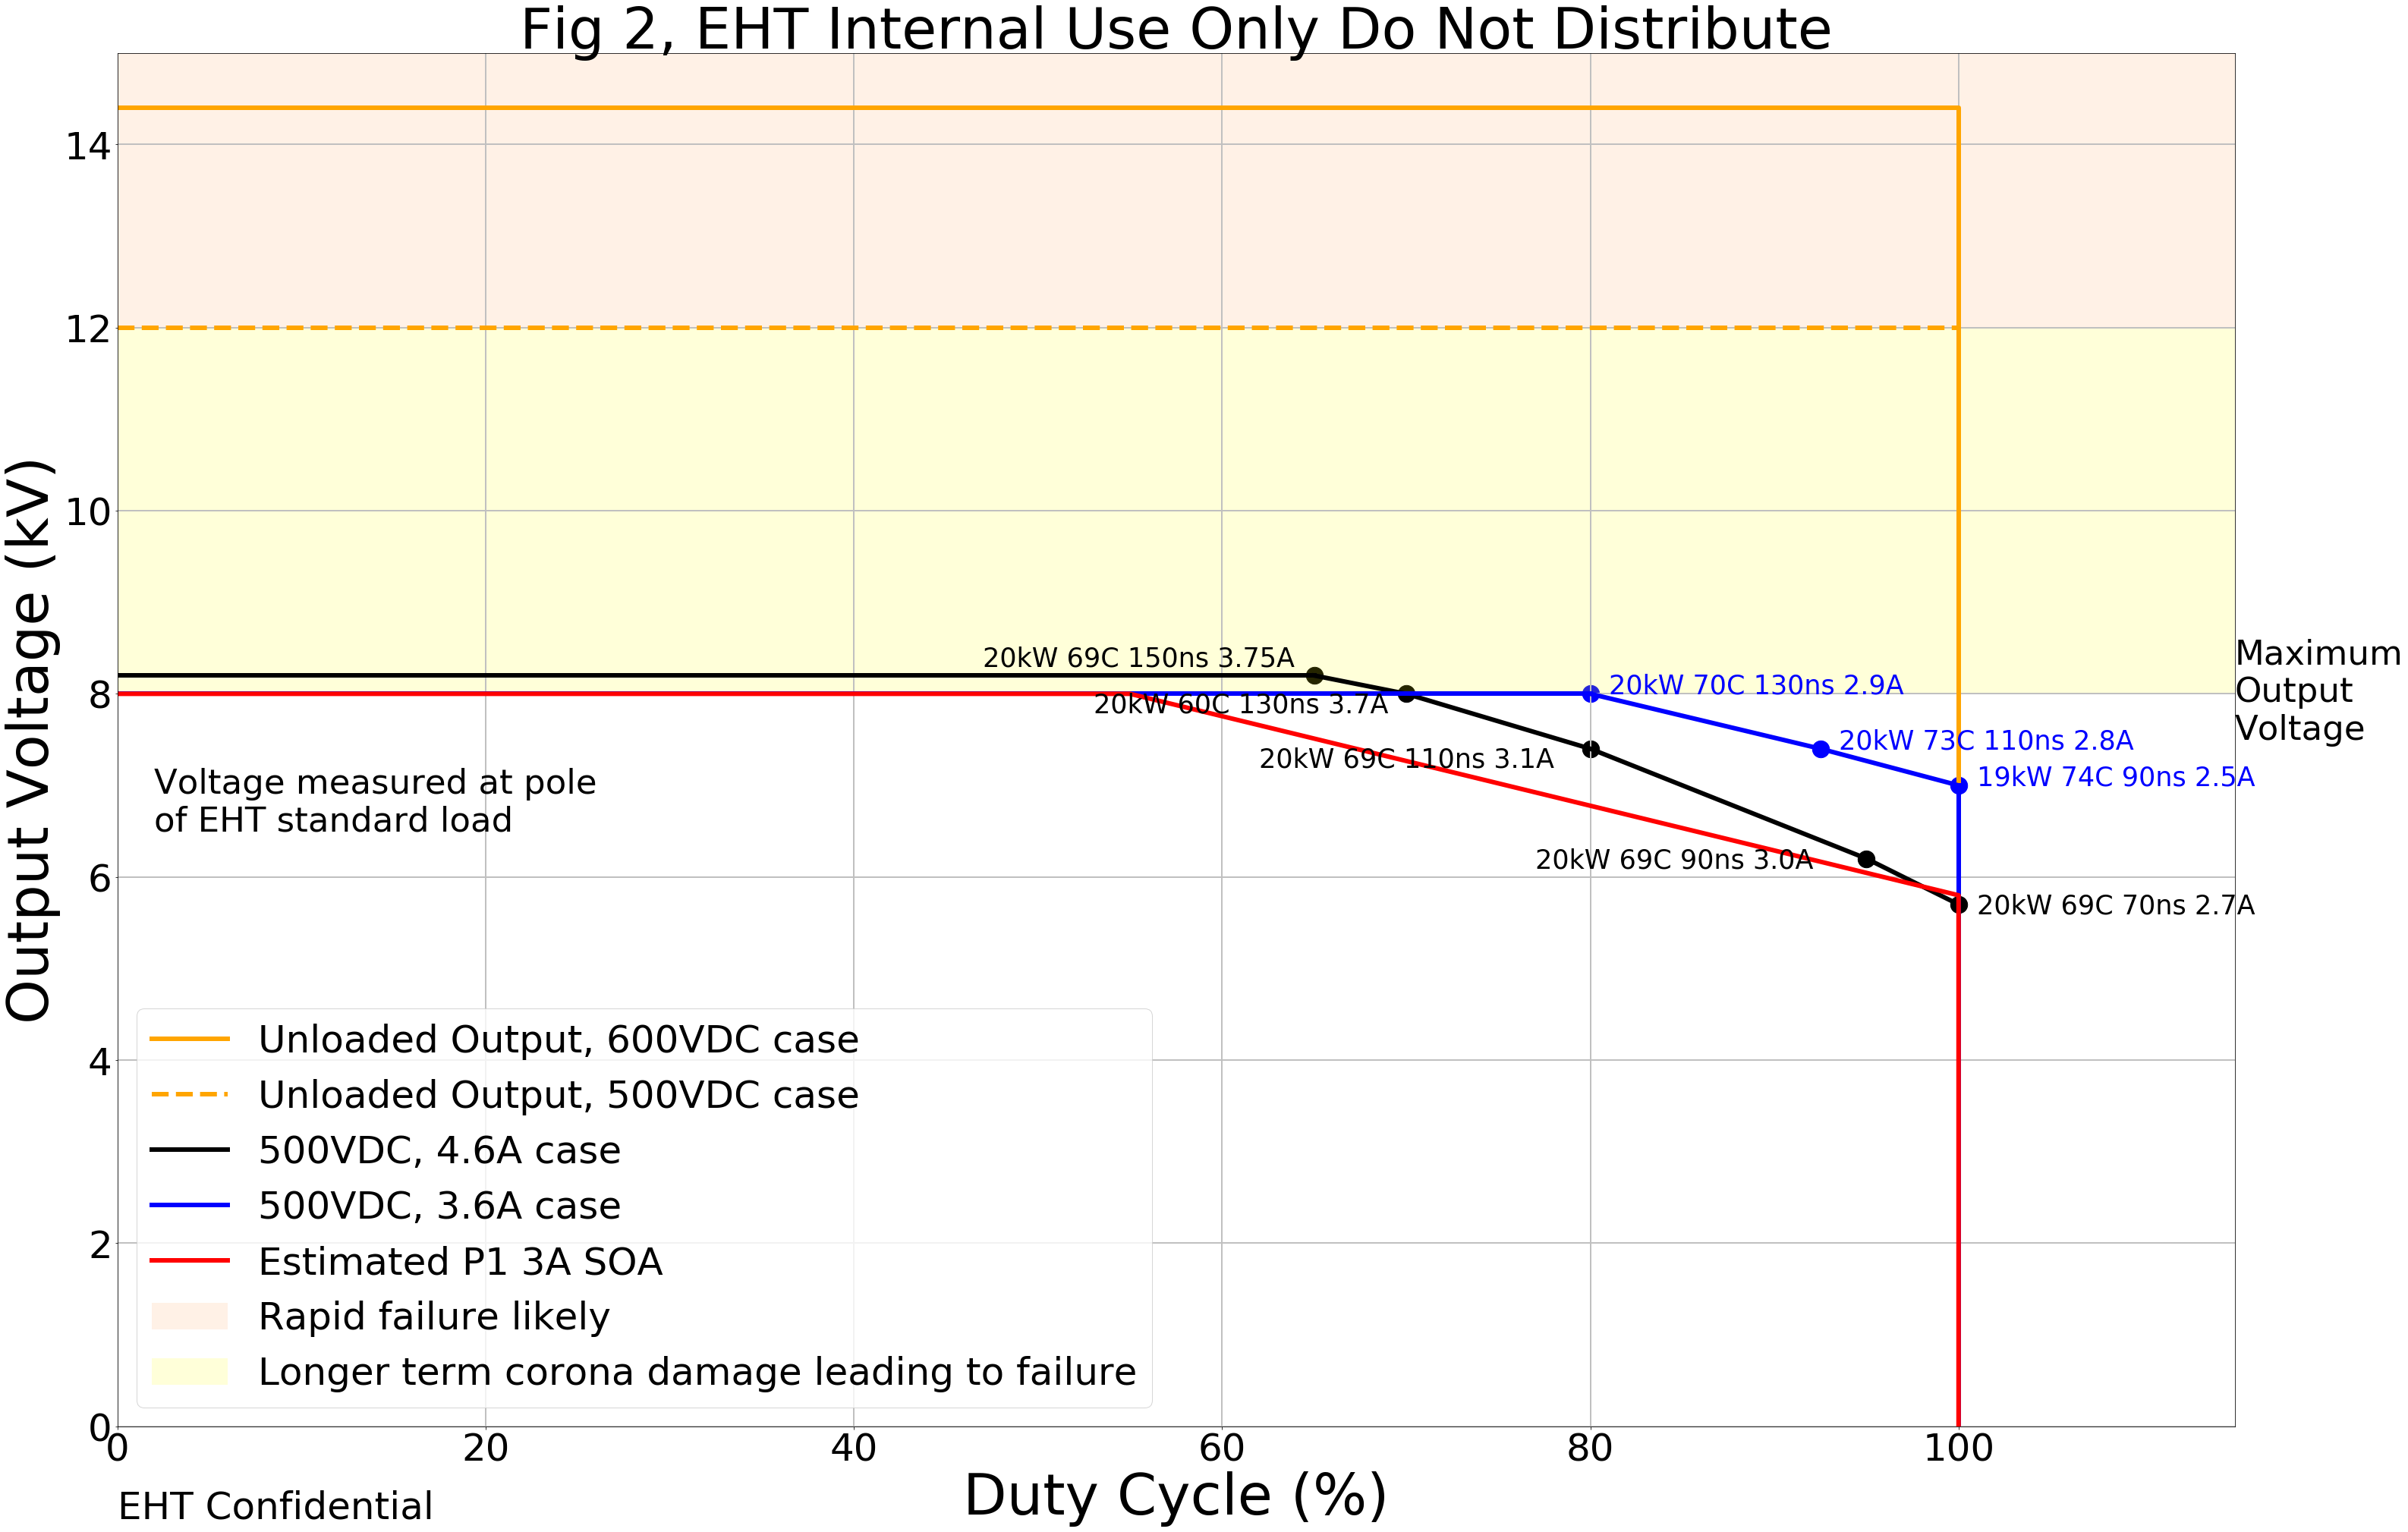

In [6]:
OpenLoad_600V = plt.plot(OpenLoad_Duty, OpenLoad_600V_OutV, c='orange', linewidth=6, label="Unloaded Output, 600VDC case")

OpenLoad_500V = plt.plot(OpenLoad_Duty, OpenLoad_500V_OutV, c='orange', linestyle='dashed', linewidth=6, label="Unloaded Output, 500VDC case")

#Nov2019_600V_3k_Scatter = plt.scatter(Nov2019_600V_3k.DC, Nov2019_600V_3k.Vout, s=500, c='magenta')
#Nov2019_600V_3k_Line = plt.plot(Nov2019_600V_3k.DC, Nov2019_600V_3k.Vout, linewidth=6, c='magenta', 
#                                label="600VDC, 2.6A case")
#Nov2019_600V_3k_Horiz = plt.plot([0, 90], [10, 10], c='magenta', linewidth=6)
#Nov2019_600V_3k_Vert = plt.plot([100, 100], [6, 0], c='magenta', linewidth=6)
#for i in range(len(Nov2019_600V_3k.DC)):
#    plt.annotate(str(Nov2019_600V_3k.P[i])+"kW "+ str(Nov2019_600V_3k.Sw[i])+"C "+str(Nov2019_600V_3k.PW[i])+"ns", 
#                 xy = (Nov2019_600V_3k.DC[i], Nov2019_600V_3k.Vout[i]), 
#                 xytext=(Nov2019_600V_3k.DC[i]+1, Nov2019_600V_3k.Vout[i]), fontsize=35, color="magenta")

#Nov2019_600V_2k_Scatter = plt.scatter(Nov2019_600V_2k.DC, Nov2019_600V_2k.Vout, s=500, c='b')    
#Nov2019_600V_2k_Line = plt.plot(Nov2019_600V_2k.DC, Nov2019_600V_2k.Vout, linewidth=6, c='b', label ="600VDC, 3.6A case")
#Nov2019_600V_2k_Horiz = plt.plot([0, 50], [9.5, 9.5], linewidth=6, c='b')
#Nov2019_600V_2k_Vert = plt.plot([100, 100], [5, 0], linewidth=6, c='b')
#for i in range(len(Nov2019_600V_2k.DC)):
#    if i == 1:
#        plt.annotate(str(Nov2019_600V_2k.P[i])+"kW "+str(Nov2019_600V_2k.Sw[i])+"C "+str(Nov2019_600V_2k.PW[i])+"ns", 
#                     xy=(Nov2019_600V_2k.DC[i], Nov2019_600V_2k.Vout[i]), 
#                     xytext=(Nov2019_600V_2k.DC[i]-14, Nov2019_600V_2k.Vout[i]), fontsize=35, color='b')
#    elif i == 3:
#        plt.annotate(str(Nov2019_600V_2k.P[i])+"kW "+str(Nov2019_600V_2k.Sw[i])+"C "+str(Nov2019_600V_2k.PW[i])+"ns", 
#                     xy=(Nov2019_600V_2k.DC[i], Nov2019_600V_2k.Vout[i]), 
#                     xytext=(Nov2019_600V_2k.DC[i]+1, Nov2019_600V_2k.Vout[i]), fontsize=35, color='b')
#    elif i == 5:
#        plt.annotate(str(Nov2019_600V_2k.P[i])+"kW "+str(Nov2019_600V_2k.Sw[i])+"C "+str(Nov2019_600V_2k.PW[i])+"ns", 
#                     xy=(Nov2019_600V_2k.DC[i], Nov2019_600V_2k.Vout[i]), 
#                     xytext=(Nov2019_600V_2k.DC[i]+1, Nov2019_600V_2k.Vout[i]+0.1), fontsize=35, color='b')
#    elif i == 7:
#        plt.annotate(str(Nov2019_600V_2k.P[i])+"kW "+str(Nov2019_600V_2k.Sw[i])+"C "+str(Nov2019_600V_2k.PW[i])+"ns", 
#                     xy=(Nov2019_600V_2k.DC[i], Nov2019_600V_2k.Vout[i]), 
#                     xytext=(Nov2019_600V_2k.DC[i]-1, Nov2019_600V_2k.Vout[i]+0.15), fontsize=35, color='b')
#    elif i == 8:
#        plt.annotate(str(Nov2019_600V_2k.P[i])+"kW "+str(Nov2019_600V_2k.Sw[i])+"C "+str(Nov2019_600V_2k.PW[i])+"ns", 
#                     xy=(Nov2019_600V_2k.DC[i], Nov2019_600V_2k.Vout[i]), 
#                     xytext=(Nov2019_600V_2k.DC[i]-12, Nov2019_600V_2k.Vout[i]+0.15), fontsize=35, color='b')
#    else:
#        plt.annotate(str(Nov2019_600V_2k.P[i])+"kW "+str(Nov2019_600V_2k.Sw[i])+"C "+str(Nov2019_600V_2k.PW[i])+"ns", 
#                     xy=(Nov2019_600V_2k.DC[i], Nov2019_600V_2k.Vout[i]), 
#                     xytext=(Nov2019_600V_2k.DC[i]+1, Nov2019_600V_2k.Vout[i]), fontsize=35, color='b')

Dec2019_500V_1750_Scatter = plt.scatter(Dec2019_500V_1750.DC, Dec2019_500V_1750.Vout, s=500, c='k')
Dec2019_500V_1750_Line = plt.plot(Dec2019_500V_1750.DC, Dec2019_500V_1750.Vout, linewidth=6, c='k', label="500VDC, 4.6A case")
Dec2019_500V_1750_Horiz = plt.plot([0, 65], [8.2, 8.2], linewidth=6, c='k')
Dec2019_500V_1750_Vert = plt.plot([100, 100], [0, 5.7], linewidth=6, c='k')
plt.annotate("20kW 60C 130ns 3.7A", xy=(70, 8), xytext=(53, 7.8), fontsize=35, color='k')
plt.annotate("20kW 69C 110ns 3.1A", xy=(80, 7.4), xytext=(62, 7.2), fontsize=35, color='k')
plt.annotate("20kW 69C 150ns 3.75A", xy=(65, 8.2), xytext=(47, 8.3), fontsize=35, color='k')
plt.annotate("20kW 69C 90ns 3.0A", xy=(95, 6.2), xytext=(77, 6.1), fontsize=35, color='k')
plt.annotate("20kW 69C 70ns 2.7A", xy=(100, 5.7), xytext=(101, 5.6), fontsize=35, color='k')

Dec2019_500V_2k_Scatter = plt.scatter(Dec2019_500V_2k.DC, Dec2019_500V_2k.Vout, c='b', s=500)
Dec2019_500V_2k_Line = plt.plot(Dec2019_500V_2k.DC, Dec2019_500V_2k.Vout, c='b', linewidth=6, label="500VDC, 3.6A case")
Dec2019_500V_2k_Horiz = plt.plot([0, 80], [8, 8], c='b', linewidth=6)
Dec2019_500V_2k_Vert = plt.plot([100, 100], [0, 7], c='b', linewidth=6)
plt.annotate("20kW 70C 130ns 2.9A", xy=(80, 8), xytext=(81, 8), fontsize=35, color='b')#2.9 A ion
plt.annotate("20kW 73C 110ns 2.8A", xy=(92.5, 7.4), xytext=(93.5, 7.4), fontsize=35, color='b')#2.8 A ion
plt.annotate("19kW 74C 90ns 2.5A", xy=(100, 7), xytext=(101, 7), fontsize=35, color='b') #2.5 A ion

Estimated_3A = plt.plot(Estimated_P1_3A_Duty, Estimated_P1_3A_OutV, c='r', linewidth=6, label="Estimated P1 3A SOA")

Rapid_failure_zone = plt.fill([0, 0, 120, 120], [12, 15, 15, 12], 'tab:orange', alpha=0.1, label="Rapid failure likely")
Long_term_damage_zone = plt.fill([0, 0, 120, 120], [8, 12, 12, 8], 'yellow', alpha=0.15, label="Longer term corona damage leading to failure")

frame1 = plt.gca()
plt.ylabel("Output Voltage (kV)", fontsize=75)
plt.xlabel("Duty Cycle (%)", fontsize=75)
plt.xticks(np.arange(0, 110, 20), fontsize=50)
plt.yticks(fontsize=50)
plt.grid(which='both', color='silver', linewidth=2)
plt.ylim(bottom=0, top=15)
plt.xlim(left=0, right=115)
plt.rcParams["figure.figsize"] = (50, 33.3)
plt.title('Fig 2, EHT Internal Use Only Do Not Distribute', fontsize=75)
plt.legend(fontsize=50)
#plt.text(1, 8.6, "DANGER: DO NOT RUN ABOVE 8 kV OUTPUT", fontsize=40)
#plt.text(1, 8.2, "DANGER: ALWAYS OPERATE AT MIN DC VOLTAGE TO REACH DESIRED OUTPUT VOLTAGE", fontsize=40)
#plt.text(45, 14, "Rapid failure likely", fontsize=45, color='tab:orange')
#plt.text(30, 11.65, "Longer term corona damage leading to failure", fontsize=45, color='tab:orange')
plt.text(0, -1, "EHT Confidential", fontsize=50)
plt.text(115, 7.5, "Maximum"+"\n"+"Output"+"\n"+"Voltage", fontsize=45)
plt.text(2, 6.5, "Voltage measured at pole"+"\n"+"of EHT standard load", fontsize=45)
#plt.text(40, 10, "EHT Internal Use Only"+"\n"+"Do not distribute", fontsize=75)
now = datetime.now()
#plt.savefig(now.strftime("%j%y%H%M%S")+"P1_Upgrade_3A_SOA_v8.png")
plt.show()

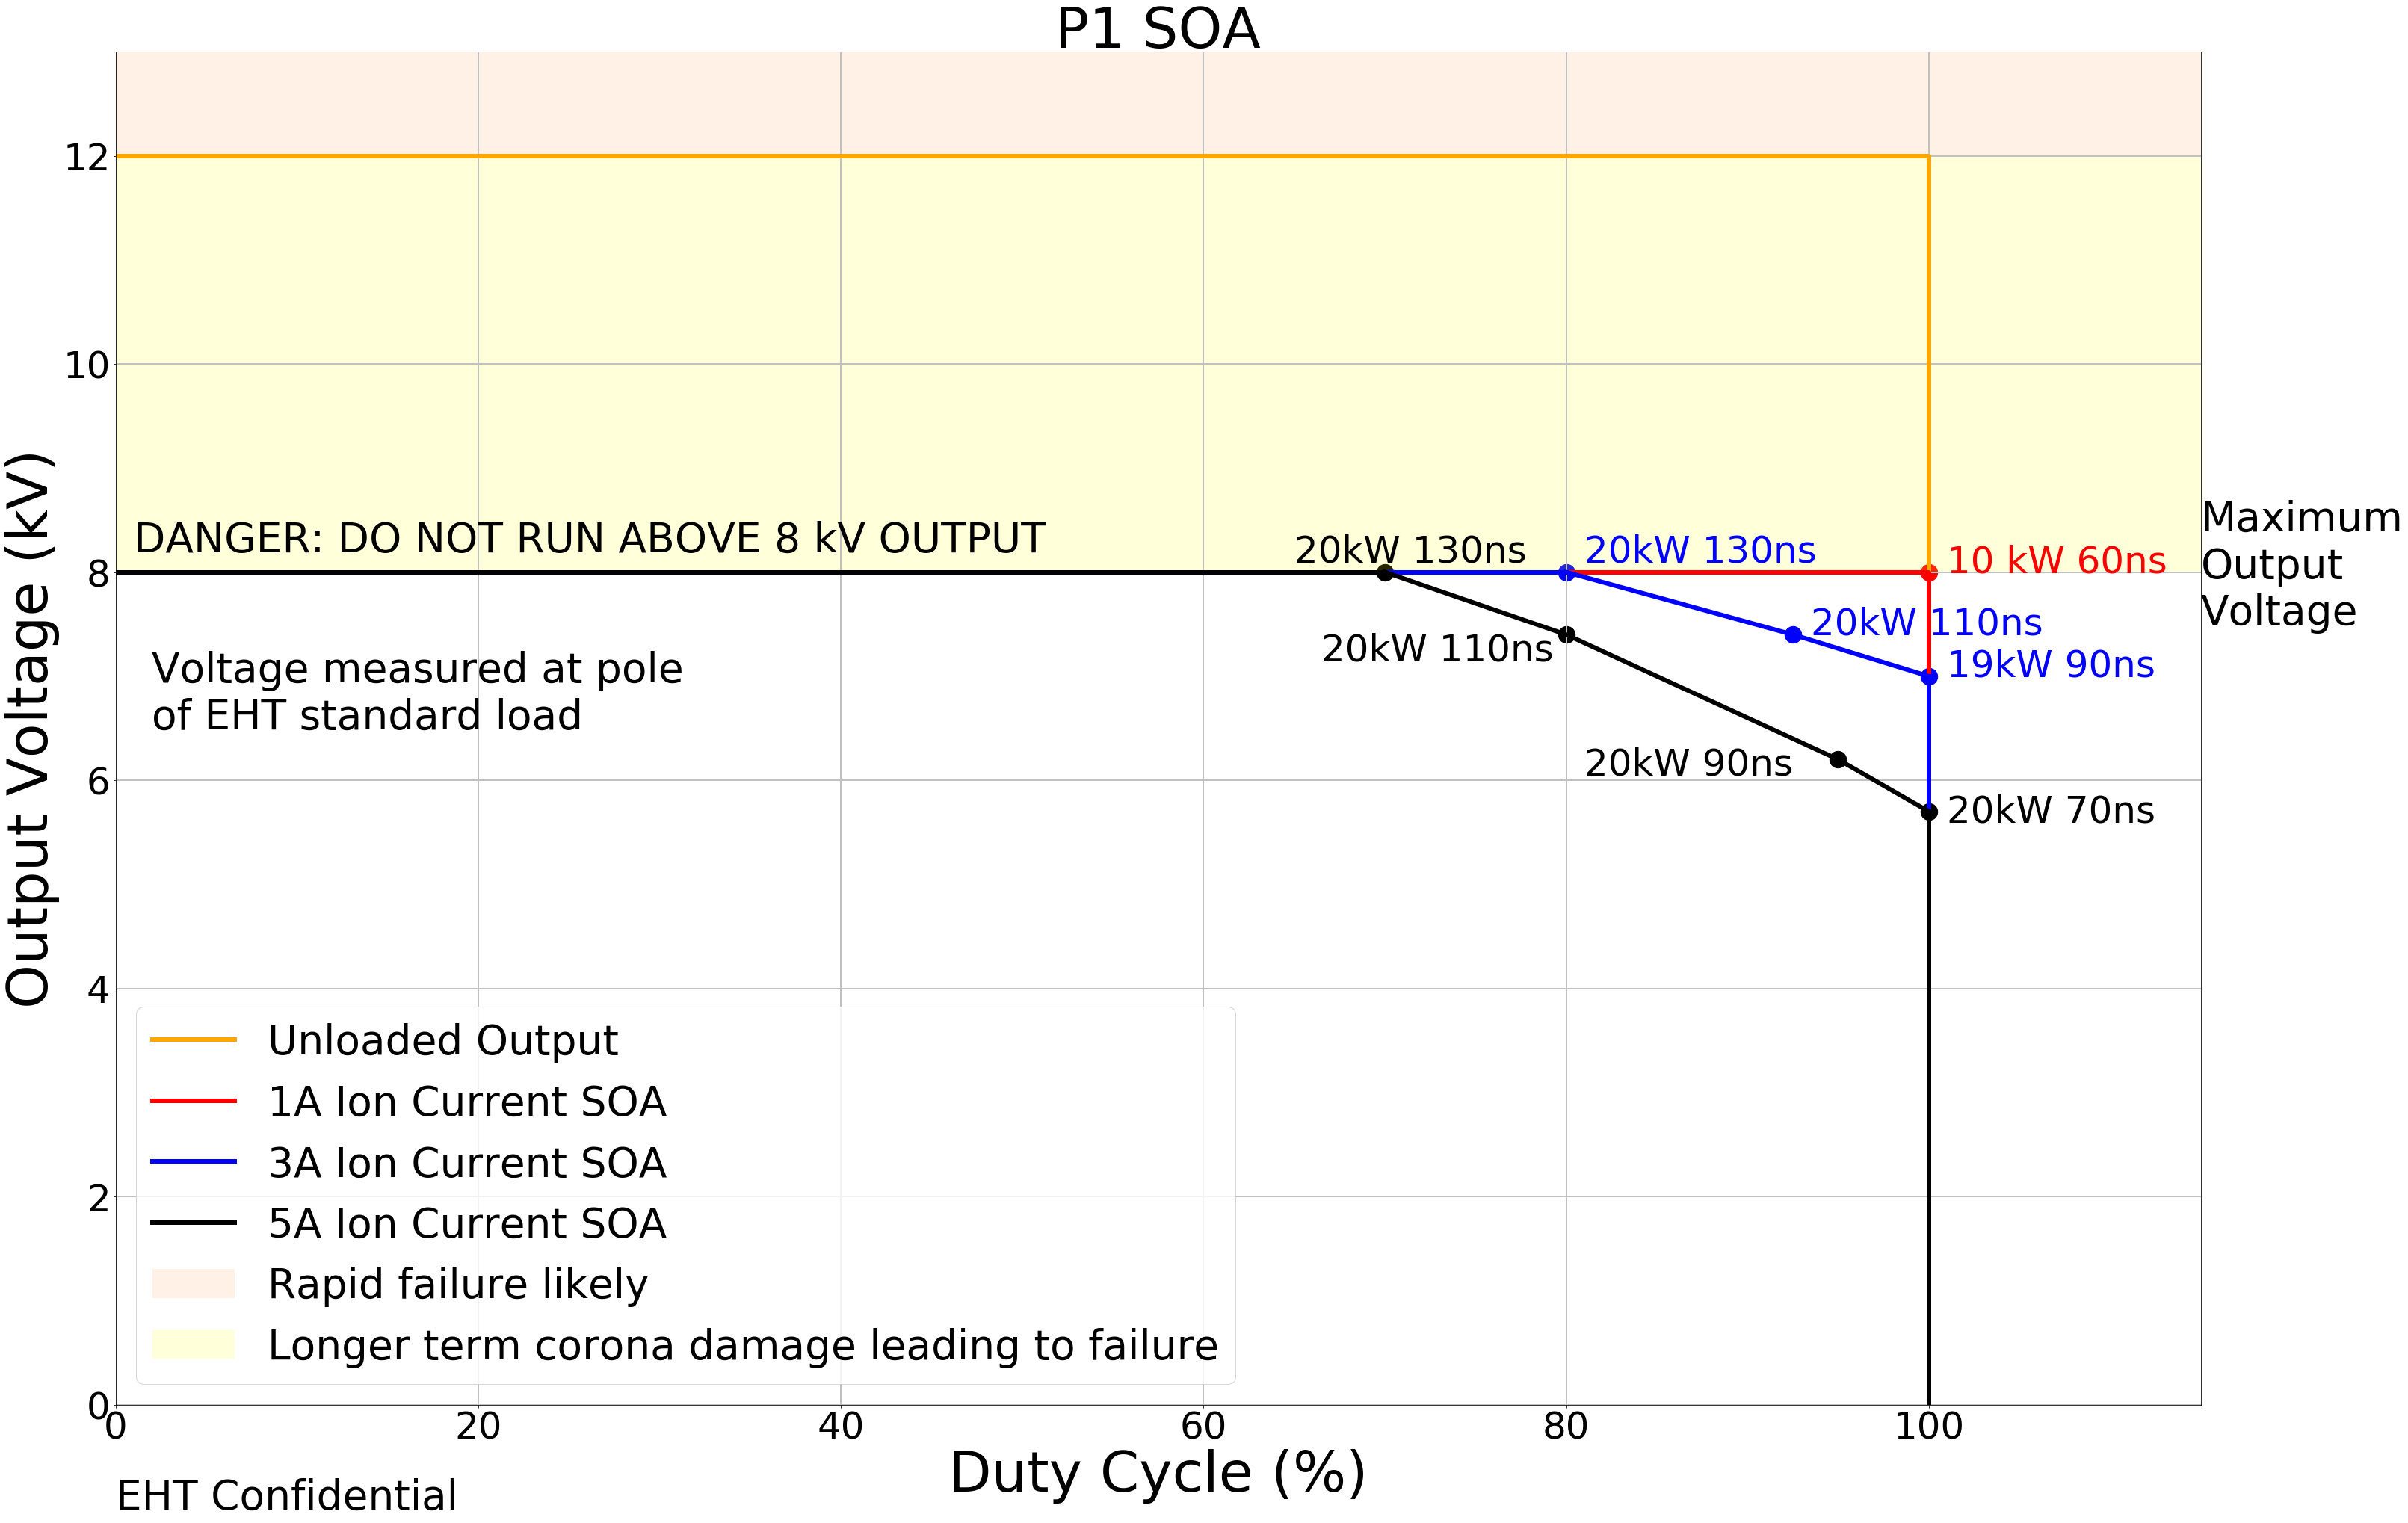

In [5]:
#OpenLoad_600V = plt.plot(OpenLoad_Duty, OpenLoad_600V_OutV, c='orange', linewidth=6, label="Unloaded Output, 600VDC case")

OpenLoad_500V = plt.plot(OpenLoad_Duty, OpenLoad_500V_OutV, c='orange', linewidth=6, label="Unloaded Output")

Estimated_1A = plt.plot([0, 100, 100], [8, 8, 0], c='r', linewidth=6, label="1A Ion Current SOA")
Estimated_1A_Scatter = plt.scatter([100], [8], c='r', s=500)
plt.annotate("10 kW 60ns", xy=(100, 8), xytext=(101, 8), fontsize=50, color='r')

Dec2019_500V_2k_Scatter = plt.scatter(Dec2019_500V_2k.DC, Dec2019_500V_2k.Vout, c='b', s=500)
Dec2019_500V_2k_Line = plt.plot(Dec2019_500V_2k.DC, Dec2019_500V_2k.Vout, c='b', linewidth=6, label="3A Ion Current SOA")
Dec2019_500V_2k_Horiz = plt.plot([0, 80], [8, 8], c='b', linewidth=6)
Dec2019_500V_2k_Vert = plt.plot([100, 100], [0, 7], c='b', linewidth=6)
plt.annotate("20kW 130ns", xy=(80, 8), xytext=(81, 8.1), fontsize=50, color='b')#2.9 A ion
plt.annotate("20kW 110ns", xy=(92.5, 7.4), xytext=(93.5, 7.4), fontsize=50, color='b')#2.8 A ion
plt.annotate("19kW 90ns", xy=(100, 7), xytext=(101, 7), fontsize=50, color='b') #2.5 A ion

FiveADC = [] #removing data point above 8 kV for 5 A curve
for i in range(len(Dec2019_500V_1750.DC)-1):
    FiveADC.append(Dec2019_500V_1750.DC[i+1])
    
FiveAVout = []
for i in range(len(Dec2019_500V_1750.Vout)-1):
    FiveAVout.append(Dec2019_500V_1750.Vout[i+1])

Dec2019_500V_1750_Scatter = plt.scatter(FiveADC, FiveAVout, s=500, c='k')
Dec2019_500V_1750_Line = plt.plot(FiveADC, FiveAVout, linewidth=6, c='k', label="5A Ion Current SOA")
Dec2019_500V_1750_Horiz = plt.plot([0, 70], [8, 8], linewidth=6, c='k')
Dec2019_500V_1750_Vert = plt.plot([100, 100], [0, 5.7], linewidth=6, c='k')
plt.annotate("20kW 130ns", xy=(70, 8), xytext=(65, 8.1), fontsize=50, color='k')
plt.annotate("20kW 110ns", xy=(80, 7.4), xytext=(66.5, 7.15), fontsize=50, color='k')
#plt.annotate("20kW 150ns", xy=(65, 8.2), xytext=(47, 8.3), fontsize=50, color='k')
plt.annotate("20kW 90ns", xy=(95, 6.2), xytext=(81, 6.05), fontsize=50, color='k')
plt.annotate("20kW 70ns", xy=(100, 5.7), xytext=(101, 5.6), fontsize=50, color='k')

Rapid_failure_zone = plt.fill([0, 0, 120, 120], [12, 15, 15, 12], 'tab:orange', alpha=0.1, label="Rapid failure likely")
Long_term_damage_zone = plt.fill([0, 0, 120, 120], [8, 12, 12, 8], 'yellow', alpha=0.15, label="Longer term corona damage leading to failure")

frame1 = plt.gca()
plt.ylabel("Output Voltage (kV)", fontsize=75)
plt.xlabel("Duty Cycle (%)", fontsize=75)
plt.xticks(np.arange(0, 110, 20), fontsize=50)
plt.yticks(fontsize=50)
plt.grid(which='both', color='silver', linewidth=2)
plt.ylim(bottom=0, top=13)
plt.xlim(left=0, right=115)
plt.rcParams["figure.figsize"] = (50, 33.3)
plt.title('P1 SOA', fontsize=75)
plt.legend(fontsize=55)
plt.text(1, 8.2, "DANGER: DO NOT RUN ABOVE 8 kV OUTPUT", fontsize=55)
#plt.text(1, 8.2, "DANGER: ALWAYS OPERATE AT MIN DC VOLTAGE TO REACH DESIRED OUTPUT VOLTAGE", fontsize=40)
plt.text(0, -1, "EHT Confidential", fontsize=55)
plt.text(115, 7.5, "Maximum"+"\n"+"Output"+"\n"+"Voltage", fontsize=55)
plt.text(2, 6.5, "Voltage measured at pole"+"\n"+"of EHT standard load", fontsize=55)
now = datetime.now()
plt.savefig(now.strftime("%j%y%H%M%S")+"P1_Upgrade_SOA_Manual_v1.png")
plt.show()